## **Polynomial Regression – House Price Prediction**

### **DATASET LOADING**

In this step, we load the **same housing dataset** used in the linear regression model.
**EDA was already performed earlier**, so this notebook **focuses only on model**
improvement using polynomial features.

In [2]:
import pandas as pd

# Load dataset
train_df = pd.read_csv("/content/california_housing_train.csv")
test_df = pd.read_csv("/content/california_housing_test.csv")

# Check shapes
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)


Train shape: (16512, 10)
Test shape: (4128, 10)


### **FEATURE & TARGET SEPARATION**

The dataset is divided into **input features** and the **target** variable.
The target variable is the median house value, which we aim to predict.


In [3]:
# Separate features and target
X_train = train_df.drop("MedHouseVal", axis=1)
y_train = train_df["MedHouseVal"]

X_test = test_df.drop("MedHouseVal", axis=1)
y_test = test_df["MedHouseVal"]

# Check shapes
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)


X_train: (16512, 9)
y_train: (16512,)
X_test: (4128, 9)
y_test: (4128,)


### **FEATURE SCALING**

Feature scaling is applied to **ensure that all input features contribute equally to the model**.This is especially important for polynomial regression,
as polynomial terms can amplify large feature values.

In [4]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit on training data and transform
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data using same scaler
X_test_scaled = scaler.transform(X_test)


### **POLYNOMIAL FEATURE CREATION**

Polynomial features are generated to **allow the model** to **learn non-linear**
relationships between input features and the target variable.

In [5]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features (degree = 2)
poly = PolynomialFeatures(degree=2, include_bias=False)

# Transform training and testing data
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Check new shape
print("Original features:", X_train_scaled.shape[1])
print("Polynomial features:", X_train_poly.shape[1])


Original features: 9
Polynomial features: 54


### **MODEL TRAINING**

A Linear Regression model is trained on polynomial-transformed features
to learn n**on-linear patterns in the housing data.**

In [6]:
from sklearn.linear_model import LinearRegression

# Initialize Linear Regression model
poly_model = LinearRegression()

# Train model on polynomial features
poly_model.fit(X_train_poly, y_train)


LinearRegression()

### **MODEL PREDICTION**

The trained **polynomial regression model** is used to **predict house prices**
on the test dataset.

In [7]:
# Predict on test data
y_pred_poly = poly_model.predict(X_test_poly)

# View first 5 predictions
y_pred_poly[:5]


array([0.78216293, 1.73254816, 4.72688641, 2.61288526, 2.76720041])

### **MODEL EVALUATION**

Regression evaluation metrics are used to assess the performance of the
polynomial regression model on unseen test data.

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred_poly)
mse = mean_squared_error(y_test, y_pred_poly)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_poly)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)


MAE: 0.4239960460426056
MSE: 0.3616104751476673
RMSE: 0.6013405650275618
R2 Score: 0.7240476208938257


### **Actual vs Predicted Visualization**

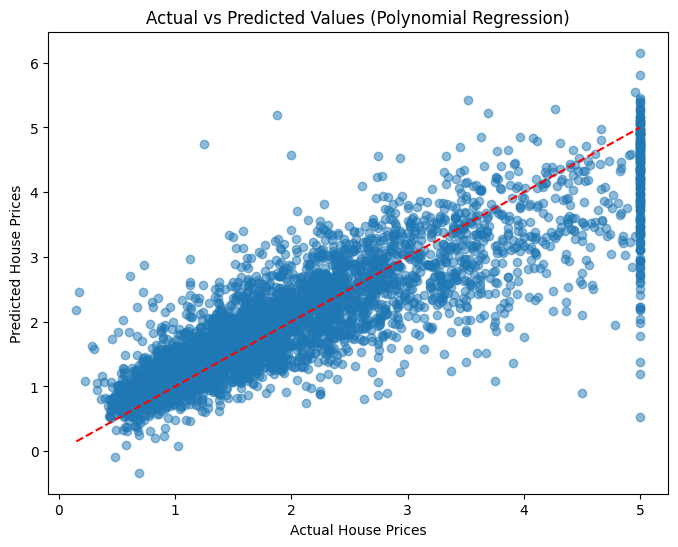

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

plt.scatter(y_test, y_pred_poly, alpha=0.5)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'r--'
)

plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted Values (Polynomial Regression)")
plt.show()
